In [9]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zahidmughal2343_video_games_sale_path = kagglehub.dataset_download('zahidmughal2343/video-games-sale')

print('Data source import complete.')

Data source import complete.


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-games-sale/.nfs000000000b24ca8500000032
/kaggle/input/video-games-sale/video games sales.csv


In [12]:
df = pd.read_csv('/kaggle/input/video-games-sale/video games sales.csv')

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
df.shape

(16598, 11)

In [15]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [16]:
#Finding Null values in the df
total_cells = np.prod(df.shape)
total_missing = df.isnull().sum().sum()
print('Total no. of missing values in complete dataset:', total_missing)  #51290-9994=41296
percent_missing = (total_missing/total_cells)*100
print("Percentage of missing values in the dataset: {:.2f}%".format(percent_missing))

Total no. of missing values in complete dataset: 329
Percentage of missing values in the dataset: 0.18%


In [17]:
df.dropna(inplace=True)

In [18]:
print(df.isnull().sum())
print("Shape after dropping nulls:", df.shape)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Shape after dropping nulls: (16291, 11)


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(16291, 11)

In [17]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [18]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [19]:
print("Minimum Year:", int(df['Year'].min()))
print("Maximum Year:", int(df['Year'].max()))

Minimum Year: 1980
Maximum Year: 2020


## Data visualizations

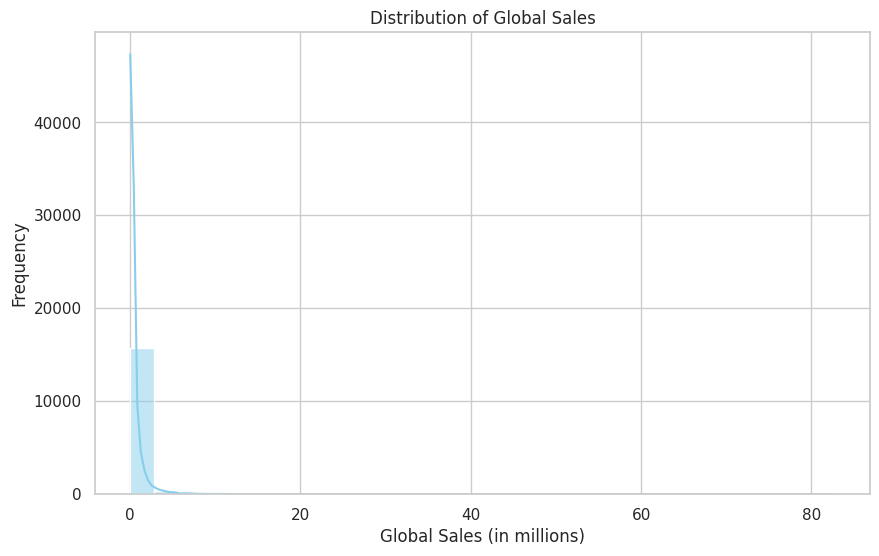

In [20]:
sns.set(style="whitegrid")

# 1. Distribution of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-1eba6bb91b47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='muted')


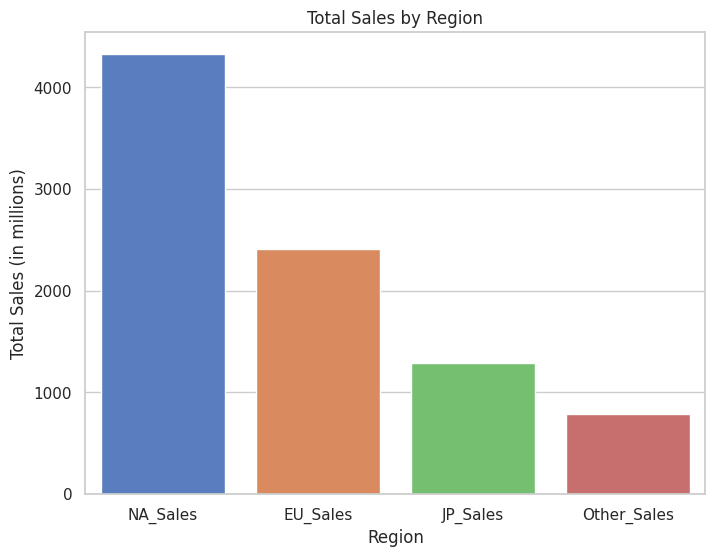

In [21]:
# 2. Sales by Region (North America, Europe, Japan, Other)
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='muted')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Region')
plt.show()

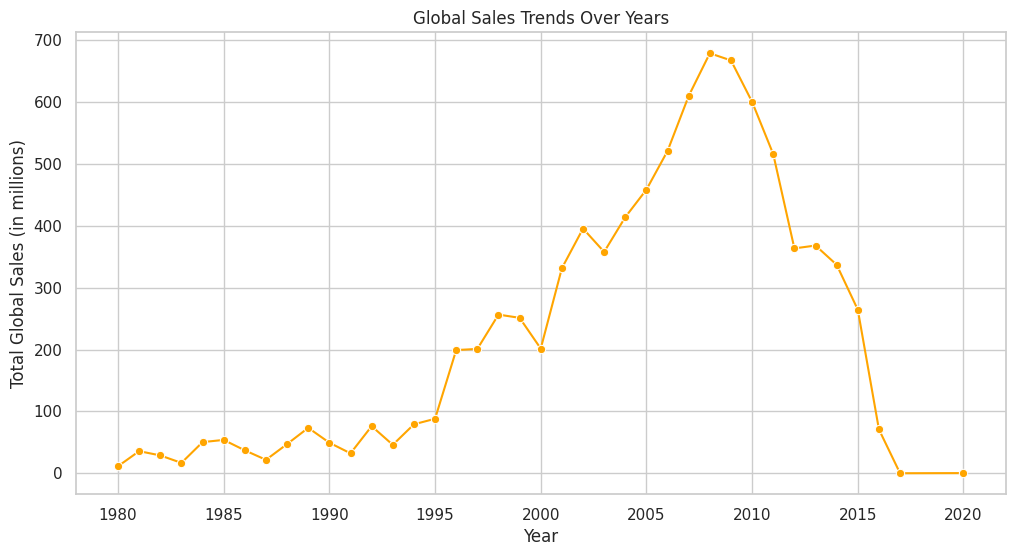

In [22]:
# 3. Sales Trends Over Years (Global Sales)
plt.figure(figsize=(12, 6))
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color='orange')
plt.title('Global Sales Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.show()

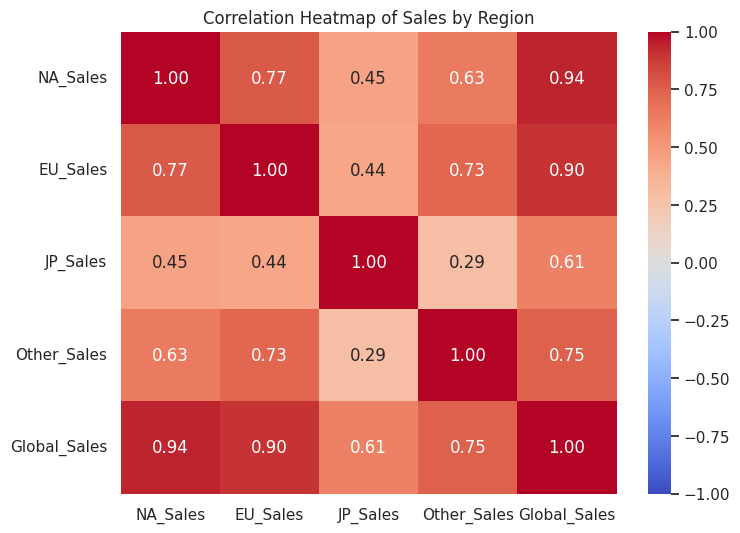

In [24]:
# 5. Correlation Heatmap
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr_matrix = df[sales_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap of Sales by Region')
plt.show()

<ipython-input-25-ab9dd8aa169e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')


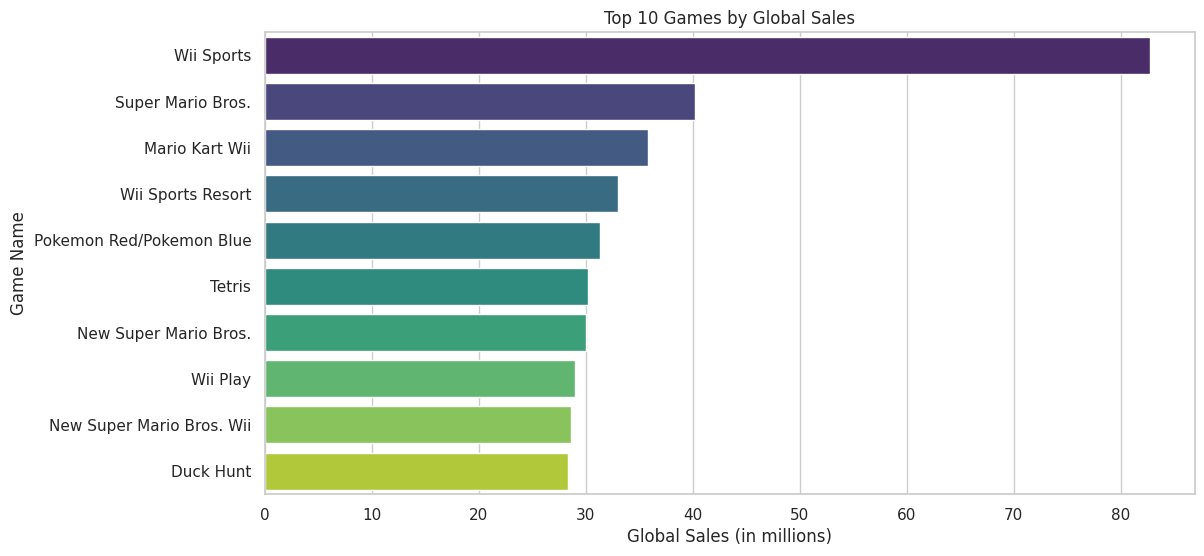

In [25]:
# 6. Top 10 Games by Global Sales
top_games = df[['Name', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()


<ipython-input-26-c1cb4e888ad9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers['Total_Sales'], y=top_publishers.index, palette='magma')


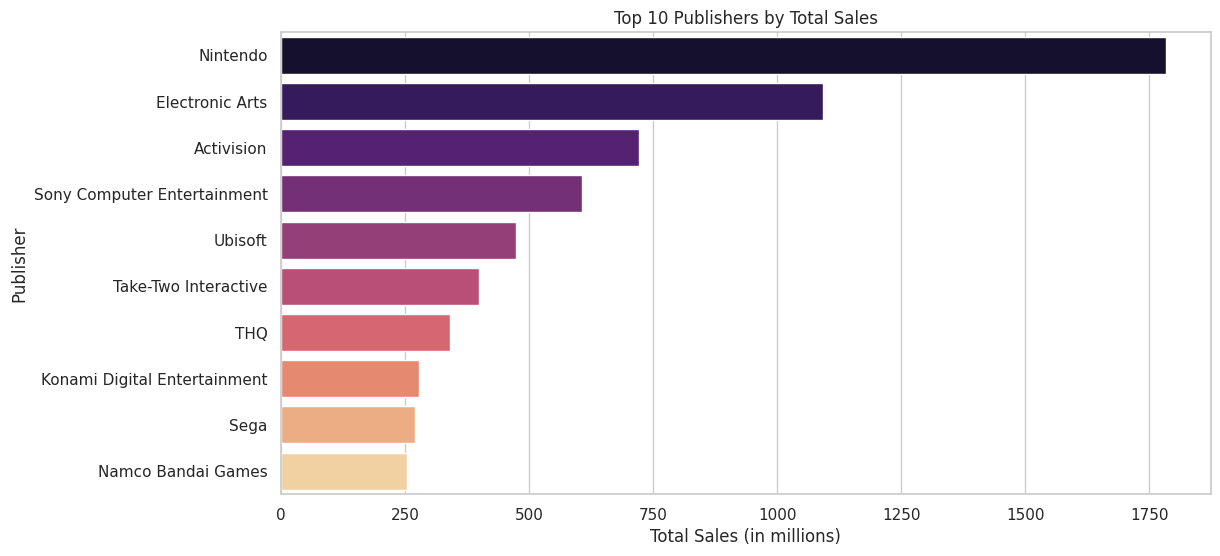

In [26]:
# 7. Sales by Publisher (Top 10)
publisher_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
publisher_sales['Total_Sales'] = publisher_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
top_publishers = publisher_sales.sort_values('Total_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers['Total_Sales'], y=top_publishers.index, palette='magma')
plt.title('Top 10 Publishers by Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

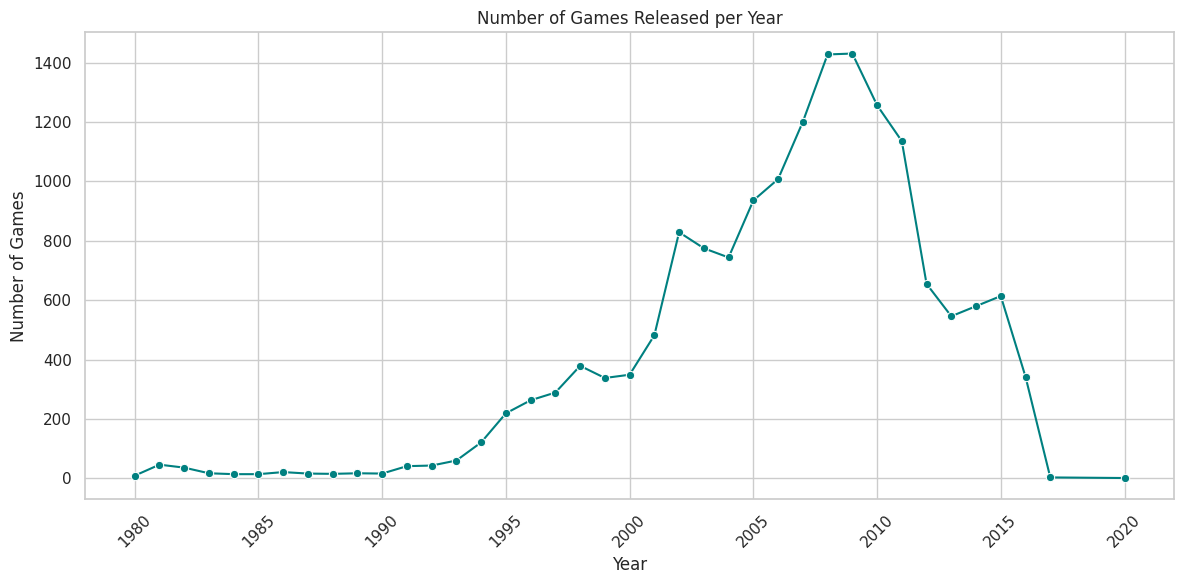

In [27]:
#8. Games Released per Year
plt.figure(figsize=(12, 6))
games_per_year = df['Year'].value_counts().sort_index()

sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='teal')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-28-17a68cdb212b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='coolwarm')


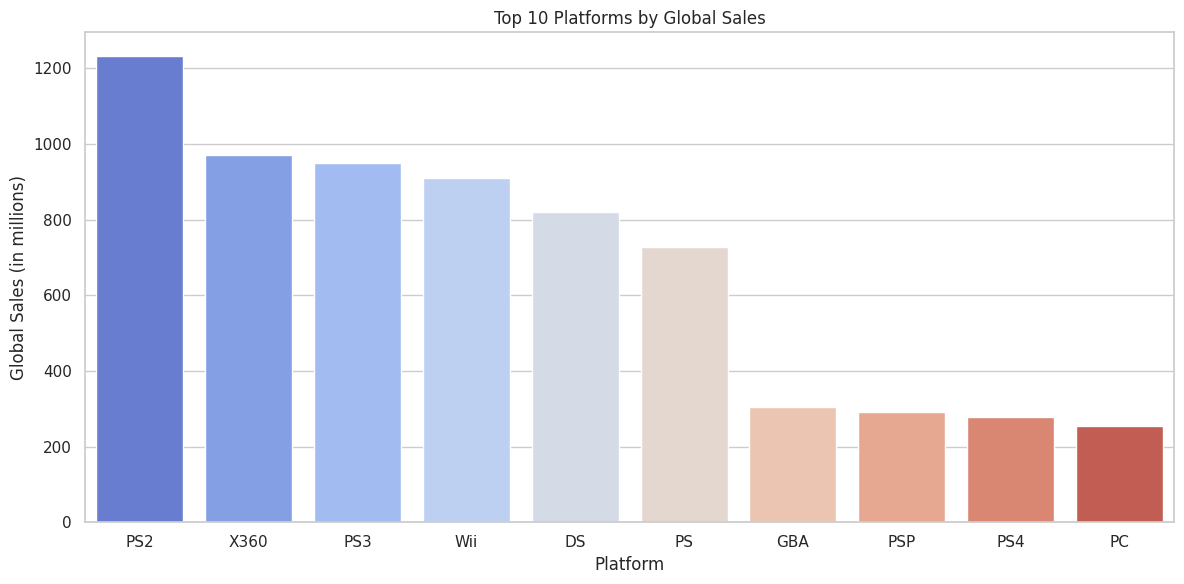

In [28]:
# 9.Top 10 Platforms by Global Sales
plt.figure(figsize=(12, 6))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='coolwarm')
plt.title('Top 10 Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.tight_layout()
plt.show()

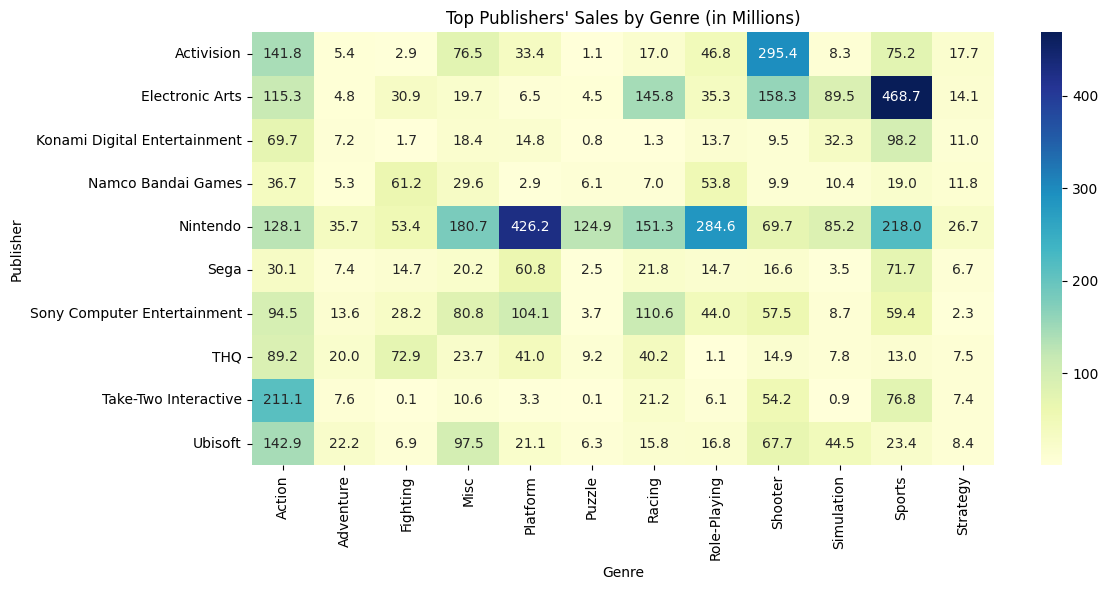

In [37]:
# 10. Heatmap: Top Publishers vs. Genre (Global Reach)
top_publishers = df['Publisher'].value_counts().head(10).index
publisher_genre_sales = df[df['Publisher'].isin(top_publishers)].groupby(['Publisher', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(publisher_genre_sales, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Top Publishers' Sales by Genre (in Millions)")
plt.ylabel("Publisher")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

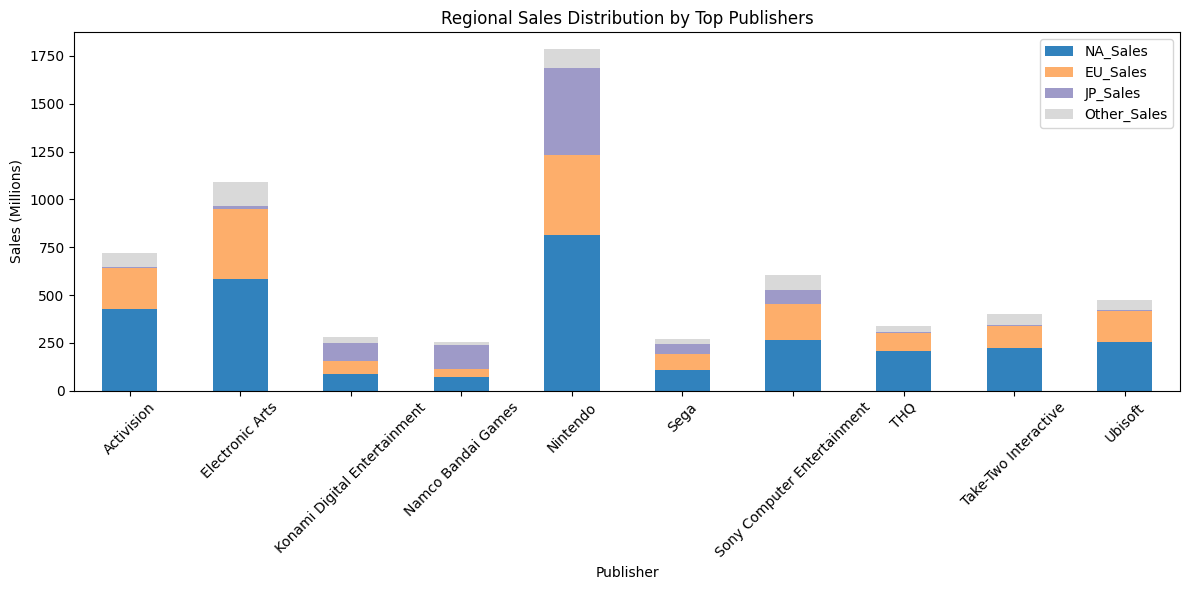

In [38]:
#11. Stacked Bar: Regional Sales per Top Publisher
regional_sales = df[df['Publisher'].isin(top_publishers)].groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

regional_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Regional Sales Distribution by Top Publishers')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

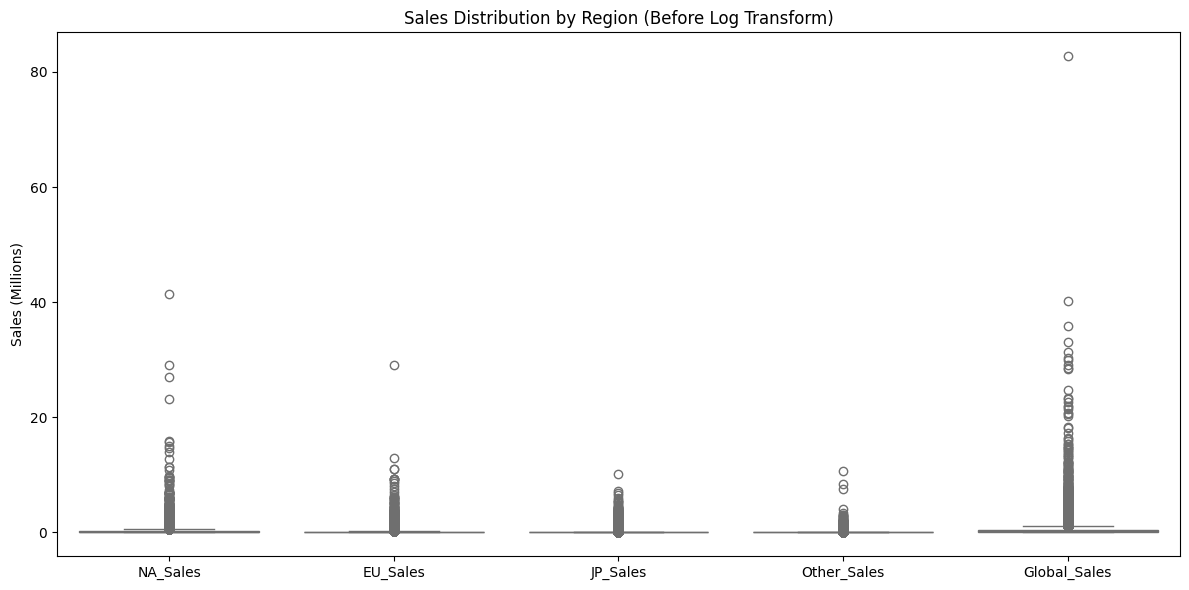

In [39]:
# 12. Boxplot: Distribution of Sales in Each Region
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[region_cols], palette="pastel")
plt.title("Sales Distribution by Region (Before Log Transform)")
plt.ylabel("Sales (Millions)")
plt.tight_layout()
plt.show()

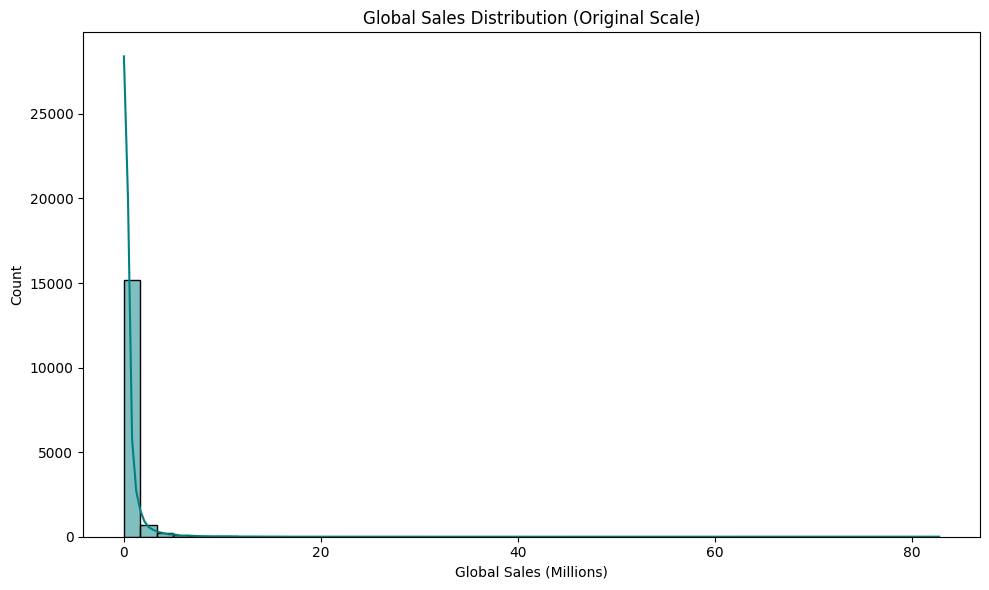

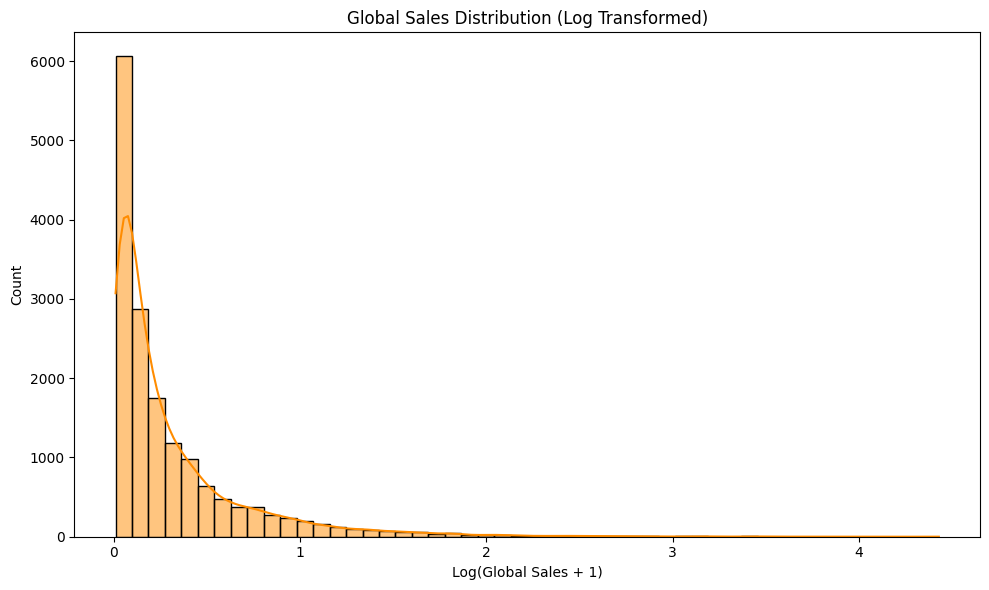

In [40]:
# 13. Histogram: Global Sales Distribution (Original Scale)
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True, color='teal')
plt.title("Global Sales Distribution (Original Scale)")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Histogram: Global Sales Distribution (Log Transformed)
df['Log_Global_Sales'] = np.log1p(df['Global_Sales'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Global_Sales'], bins=50, kde=True, color='darkorange')
plt.title("Global Sales Distribution (Log Transformed)")
plt.xlabel("Log(Global Sales + 1)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<ipython-input-41-58ad0f5d152a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y='Sales', data=melted_df, palette="coolwarm", scale='width', inner='quartile')
<ipython-input-41-58ad0f5d152a>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Region', y='Sales', data=melted_df, palette="coolwarm", scale='width', inner='quartile')


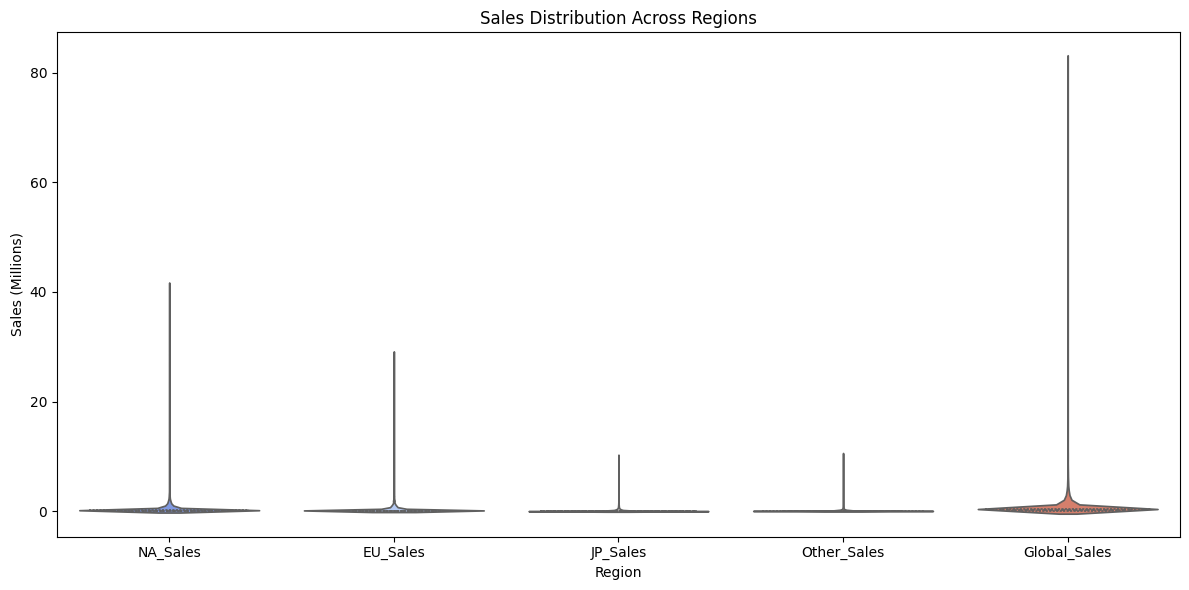

In [41]:
# 14. Violin Plot: Sales Spread by Region
melted_df = df.melt(value_vars=region_cols, var_name='Region', value_name='Sales')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Sales', data=melted_df, palette="coolwarm", scale='width', inner='quartile')
plt.title("Sales Distribution Across Regions")
plt.ylabel("Sales (Millions)")
plt.tight_layout()
plt.show()

<ipython-input-42-f370cdbc6e1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='magma')


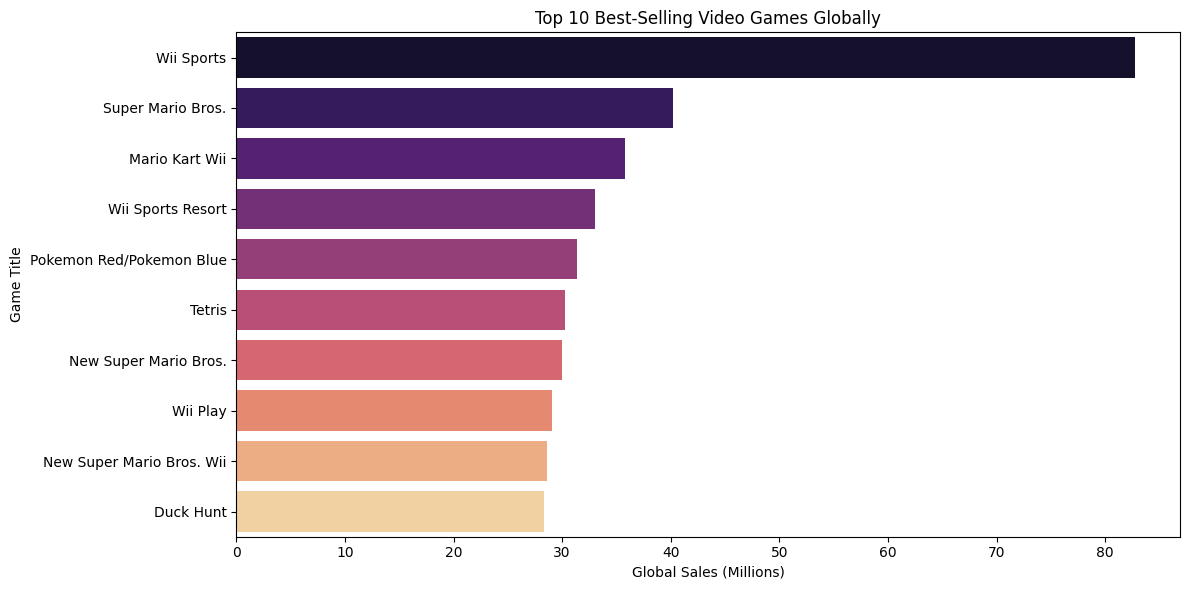

In [42]:
# 15. Top 10 Games by Global Sales
top_games = df.sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='magma')
plt.title("Top 10 Best-Selling Video Games Globally")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

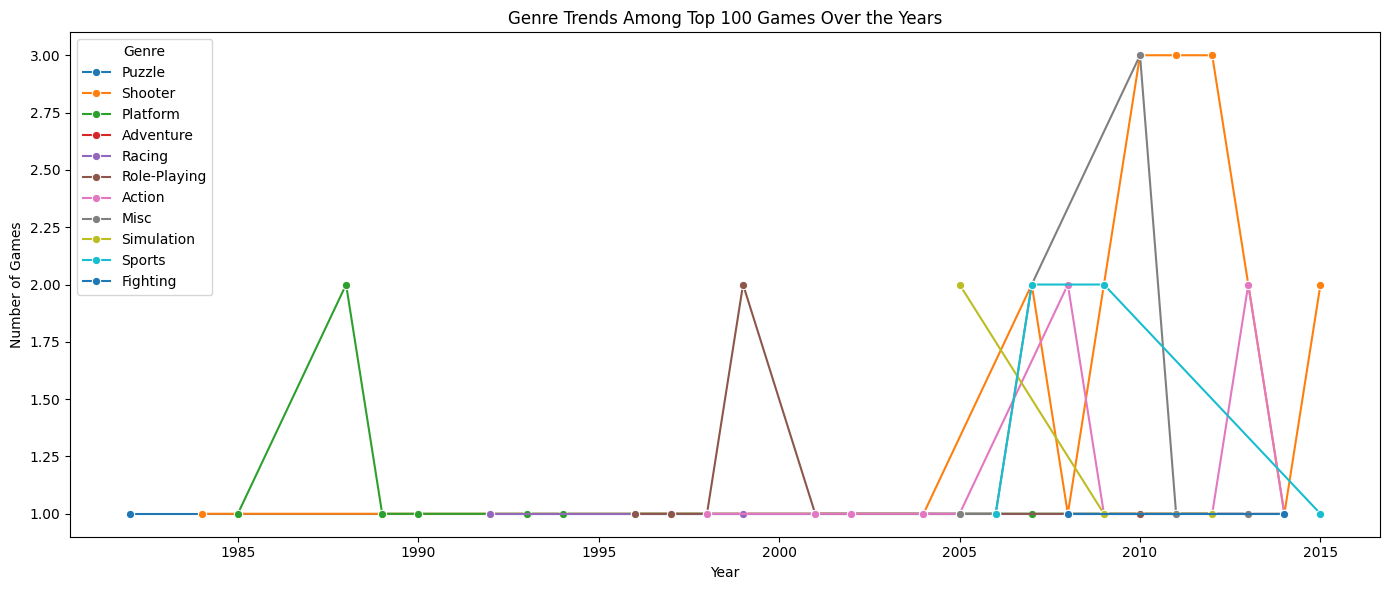

In [44]:
# 16. Genre Trend in Top Games Over Years
top_100 = df.sort_values('Global_Sales', ascending=False).head(100)
genre_year_trend = top_100.groupby(['Year', 'Genre']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=genre_year_trend, x='Year', y='Count', hue='Genre', marker='o', palette='tab10')
plt.title("Genre Trends Among Top 100 Games Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

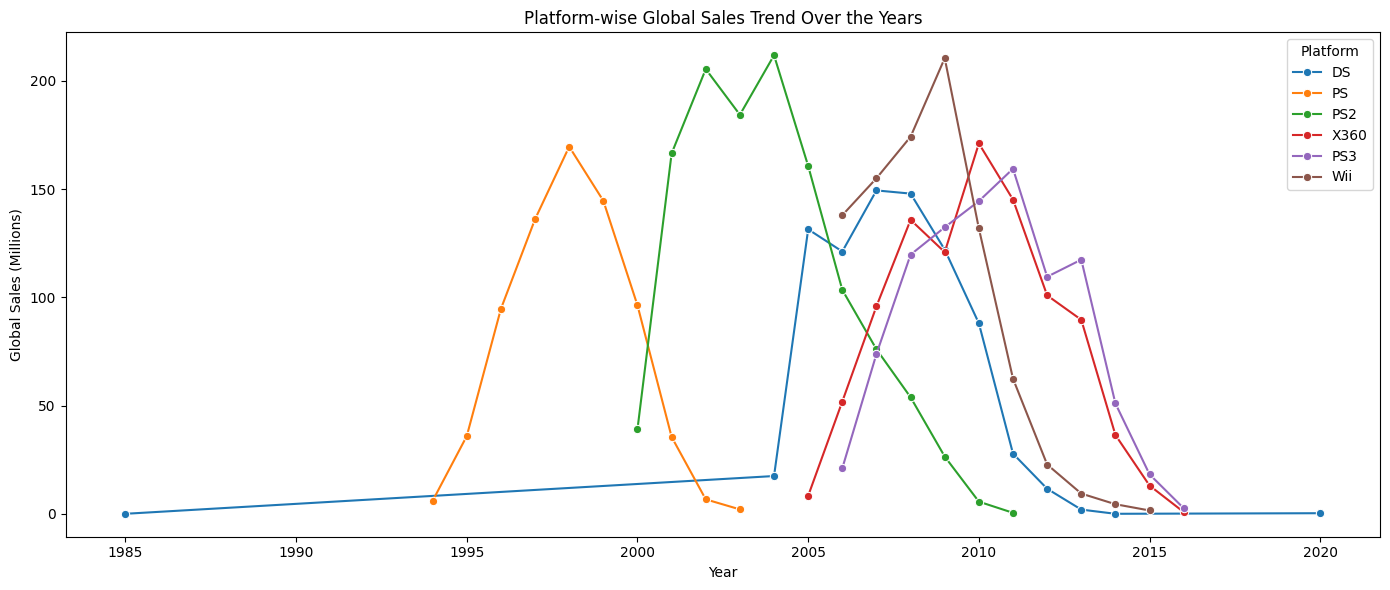

In [45]:
# 17. Yearly Sales Trend of Top Platforms
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(6).index
platform_yearly_sales = df[df['Platform'].isin(top_platforms)].groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=platform_yearly_sales, x='Year', y='Global_Sales', hue='Platform', marker='o', palette='tab10')
plt.title("Platform-wise Global Sales Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.tight_layout()
plt.show()

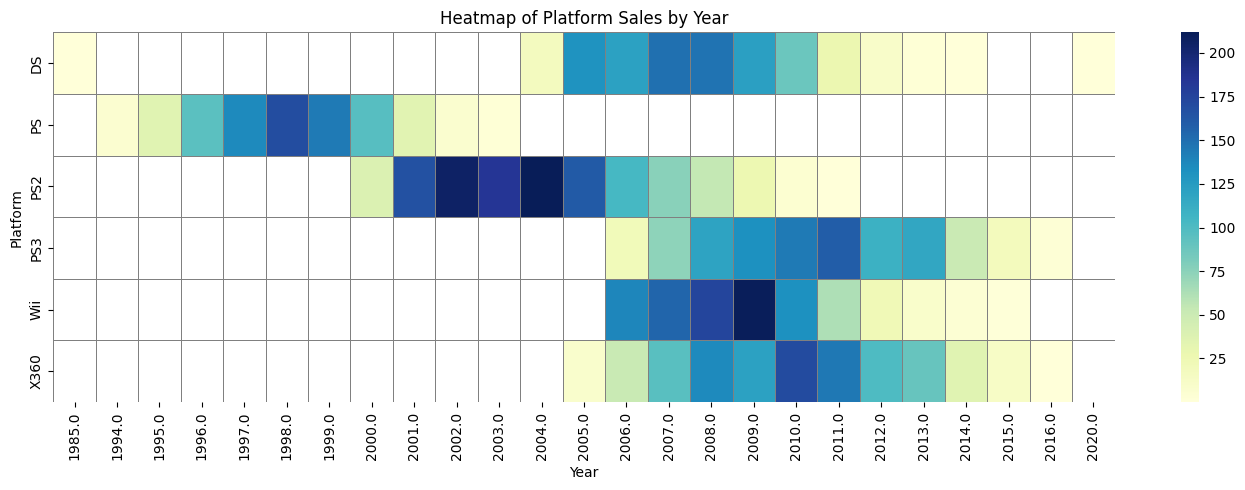

In [46]:
# 18. Heatmap of Platform Sales Over Years
pivot_platform = platform_yearly_sales.pivot(index='Platform', columns='Year', values='Global_Sales')

plt.figure(figsize=(14, 5))
sns.heatmap(pivot_platform, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Platform Sales by Year")
plt.xlabel("Year")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

<ipython-input-48-2787faa831c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_diversity, x='Year', y='Unique_Genres', palette='magma')


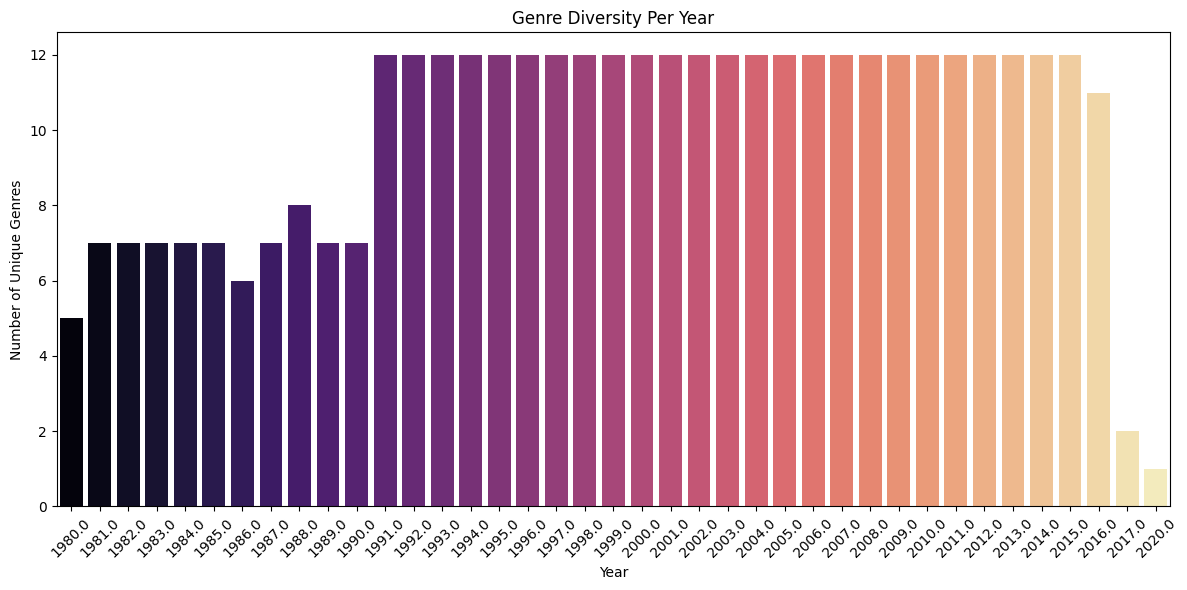

In [48]:
# 19. Genre Diversity Per Year
genre_diversity = df.groupby('Year')['Genre'].nunique().reset_index(name='Unique_Genres')

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_diversity, x='Year', y='Unique_Genres', palette='magma')
plt.title("Genre Diversity Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

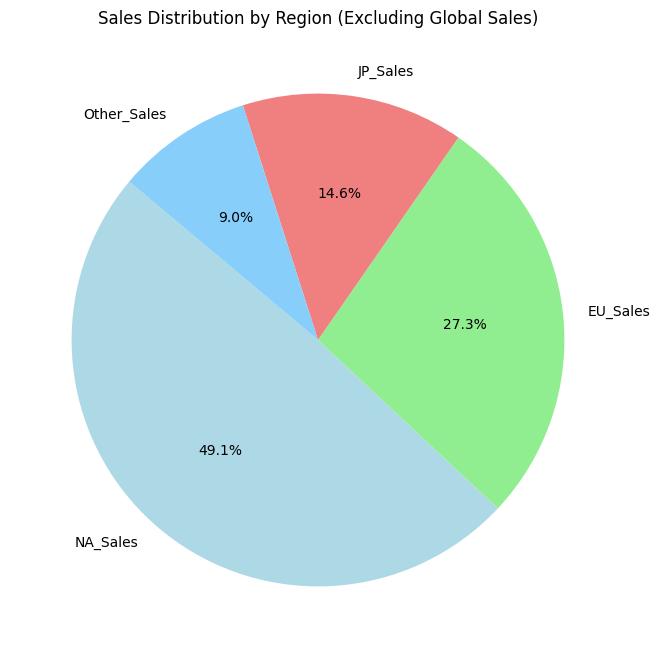

In [49]:
# 20. Pie chart for each region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title("Sales Distribution by Region (Excluding Global Sales)")
plt.show()

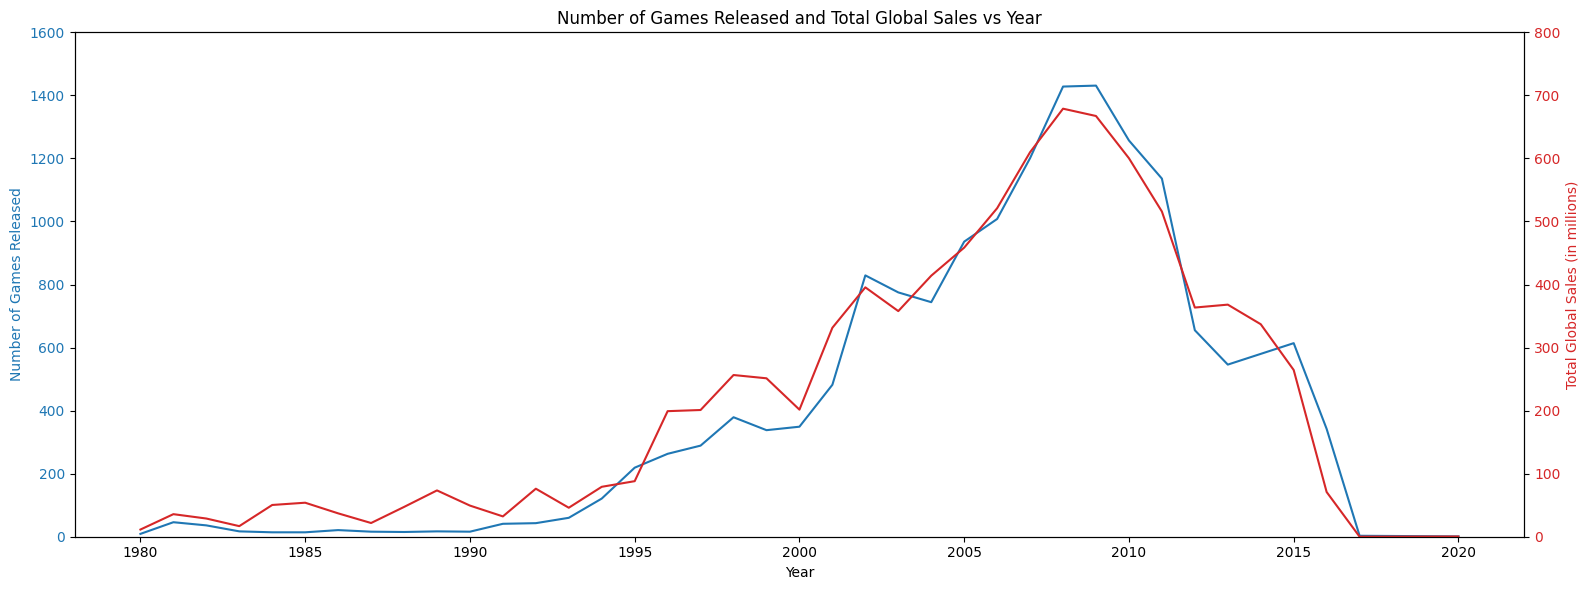

In [51]:
fig, ax1 = plt.subplots(figsize=(16, 6))
color_blue = 'tab:blue'
releases_count_year = df.groupby('Year').count()

# Line plot for the number of games released by year
ax1.plot(releases_count_year.index, releases_count_year['Global_Sales'], color=color_blue)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Games Released', color=color_blue)
ax1.set_title('Number of Games Released and Total Global Sales vs Year')
ax1.tick_params(axis='y', labelcolor=color_blue)

ax1.set_ylim(0, 1600)
ax2 = ax1.twinx()

color_red = 'tab:red'

# Plot the global sales over the years
global_sales_year = df.groupby('Year')['Global_Sales'].sum()
ax2.plot(global_sales_year.index, global_sales_year, color=color_red)

ax2.set_ylabel('Total Global Sales (in millions)', color=color_red)
ax2.tick_params(axis='y', labelcolor=color_red)
ax2.set_ylim(0, 800)

plt.tight_layout()
plt.show()

<ipython-input-40-470c31970761>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-470c31970761>:5: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



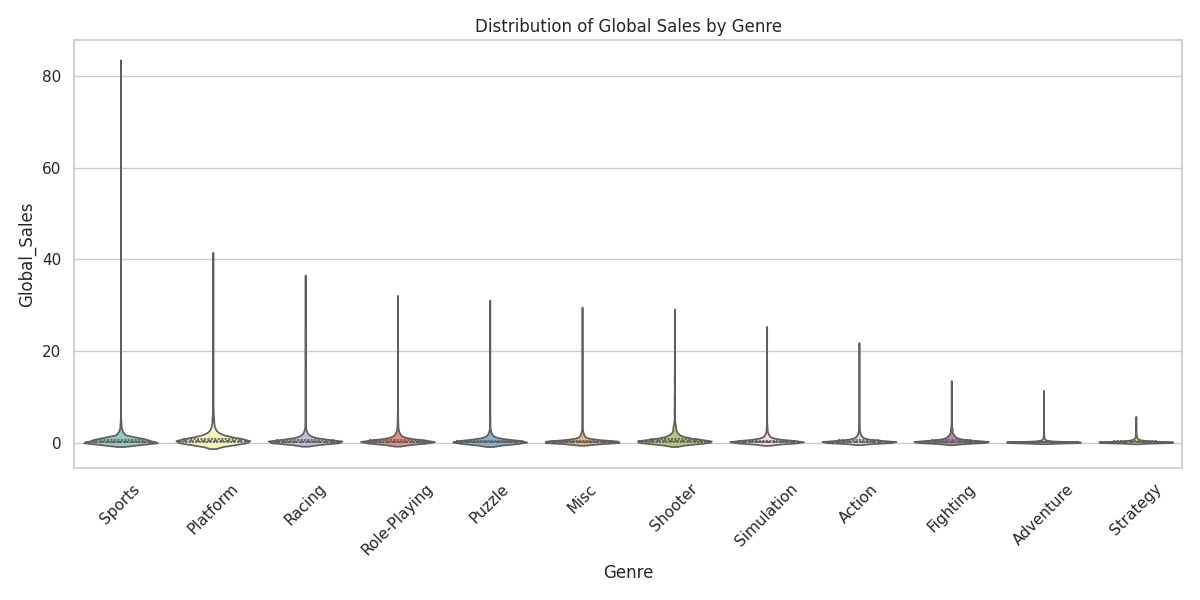

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Global_Sales', data=df, palette='Set3', scale='width', inner='quartile')
plt.title('Distribution of Global Sales by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("violin_plot.png")
plt.close()

Image("violin_plot.png")

## Predictive modeling

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [22]:
# Drop any rows with missing values
df = df.dropna()

X = df.drop(['Global_Sales', 'Name'], axis=1)
y = df['Global_Sales']

# Encoding categorical features
categorical_features = ['Platform', 'Genre', 'Publisher']
numerical_features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features), # Changed here
        ('num', 'passthrough', numerical_features)
    ])

In [23]:
# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create a dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor (SVM)": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgb.XGBRegressor(),
    "LightGBM Regressor": lgb.LGBMRegressor()
}


Training Linear Regression...
Performance of Linear Regression:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.01
R-squared (R2): 1.00


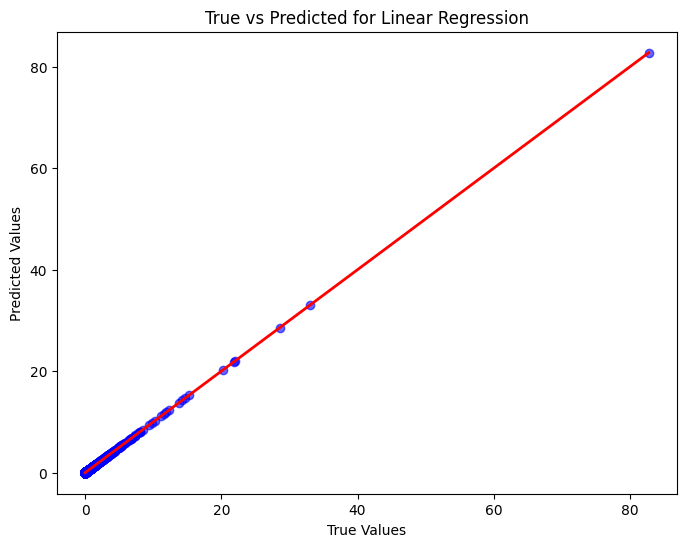


Training Decision Tree Regressor...
Performance of Decision Tree Regressor:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.62
Root Mean Squared Error (RMSE): 0.79
R-squared (R2): 0.85


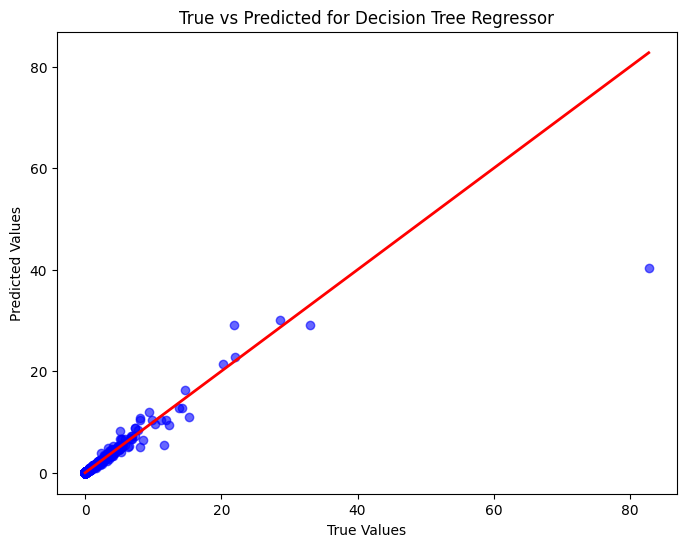


Training Random Forest Regressor...
Performance of Random Forest Regressor:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.78
Root Mean Squared Error (RMSE): 0.88
R-squared (R2): 0.82


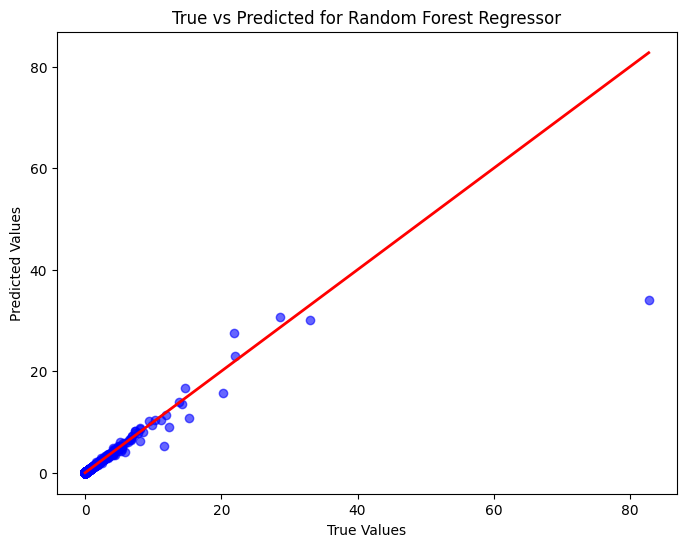


Training Support Vector Regressor (SVM)...
Performance of Support Vector Regressor (SVM):
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 4.40
Root Mean Squared Error (RMSE): 2.10
R-squared (R2): -0.03


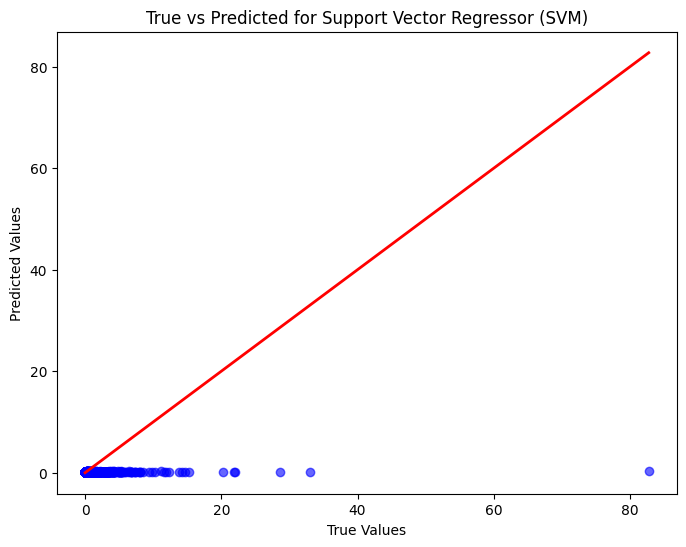


Training Gradient Boosting Regressor...
Performance of Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.61
Root Mean Squared Error (RMSE): 0.78
R-squared (R2): 0.86


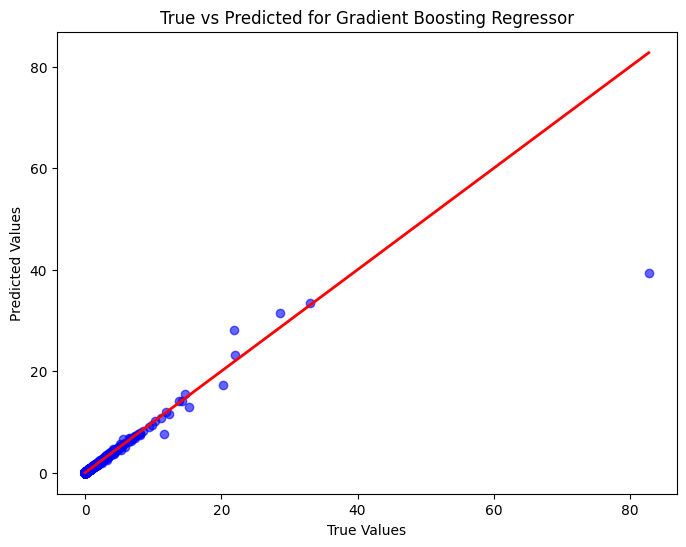


Training XGBoost Regressor...
Performance of XGBoost Regressor:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.95
Root Mean Squared Error (RMSE): 0.98
R-squared (R2): 0.78


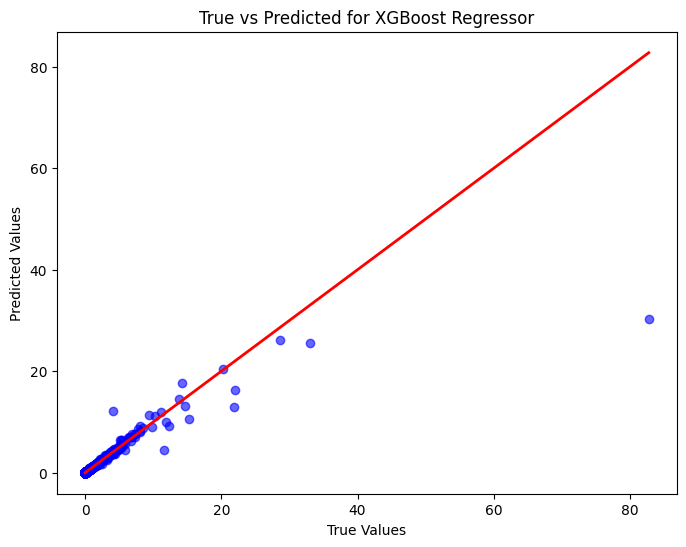


Training LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1004
[LightGBM] [Info] Number of data points in the train set: 13032, number of used features: 116
[LightGBM] [Info] Start training from score 0.534032


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performance of LightGBM Regressor:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.99
Root Mean Squared Error (RMSE): 1.00
R-squared (R2): 0.77


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


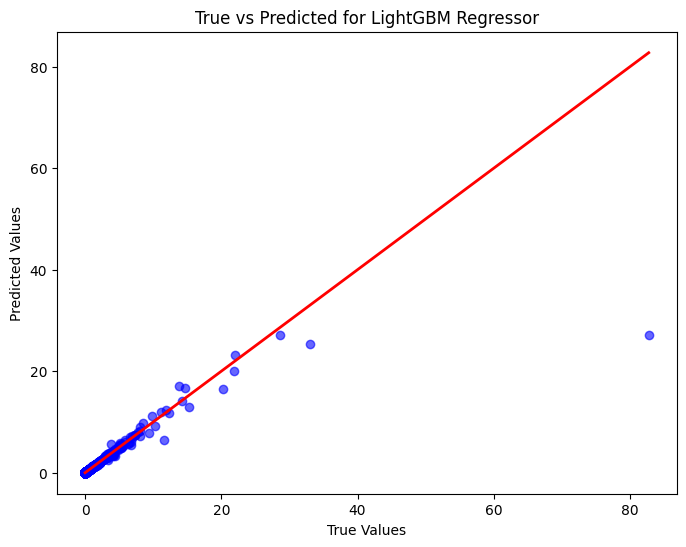

In [25]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Performance of {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Plot true vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f'True vs Predicted for {model_name}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [26]:
# Create a dictionary to store evaluation results
eval_results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R2": []
}

In [27]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results to the dictionary
    eval_results["Model"].append(model_name)
    eval_results["MAE"].append(mae)
    eval_results["MSE"].append(mse)
    eval_results["R2"].append(r2)

    print(f"Performance of {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")


Training Linear Regression...
Performance of Linear Regression:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00

Training Decision Tree Regressor...
Performance of Decision Tree Regressor:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.62
R-squared (R2): 0.85

Training Random Forest Regressor...
Performance of Random Forest Regressor:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.81
R-squared (R2): 0.81

Training Support Vector Regressor (SVM)...
Performance of Support Vector Regressor (SVM):
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 4.40
R-squared (R2): -0.03

Training Gradient Boosting Regressor...
Performance of Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.61
R-squared (R2): 0.86

Training XGBoost Regressor...
Performance of XGBoost Regressor:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.95
R-squared (R2): 0.78

Training LightGBM Regressor...
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performance of LightGBM Regressor:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.99
R-squared (R2): 0.77


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [28]:
eval_df = pd.DataFrame(eval_results)

<ipython-input-33-0a6c9ef4bcf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=eval_df, palette="viridis", ax=axes[0, 0])
<ipython-input-33-0a6c9ef4bcf5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=eval_df, palette="plasma", ax=axes[0, 1])
<ipython-input-33-0a6c9ef4bcf5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=eval_df, palette="cividis", ax=axes[1, 0])


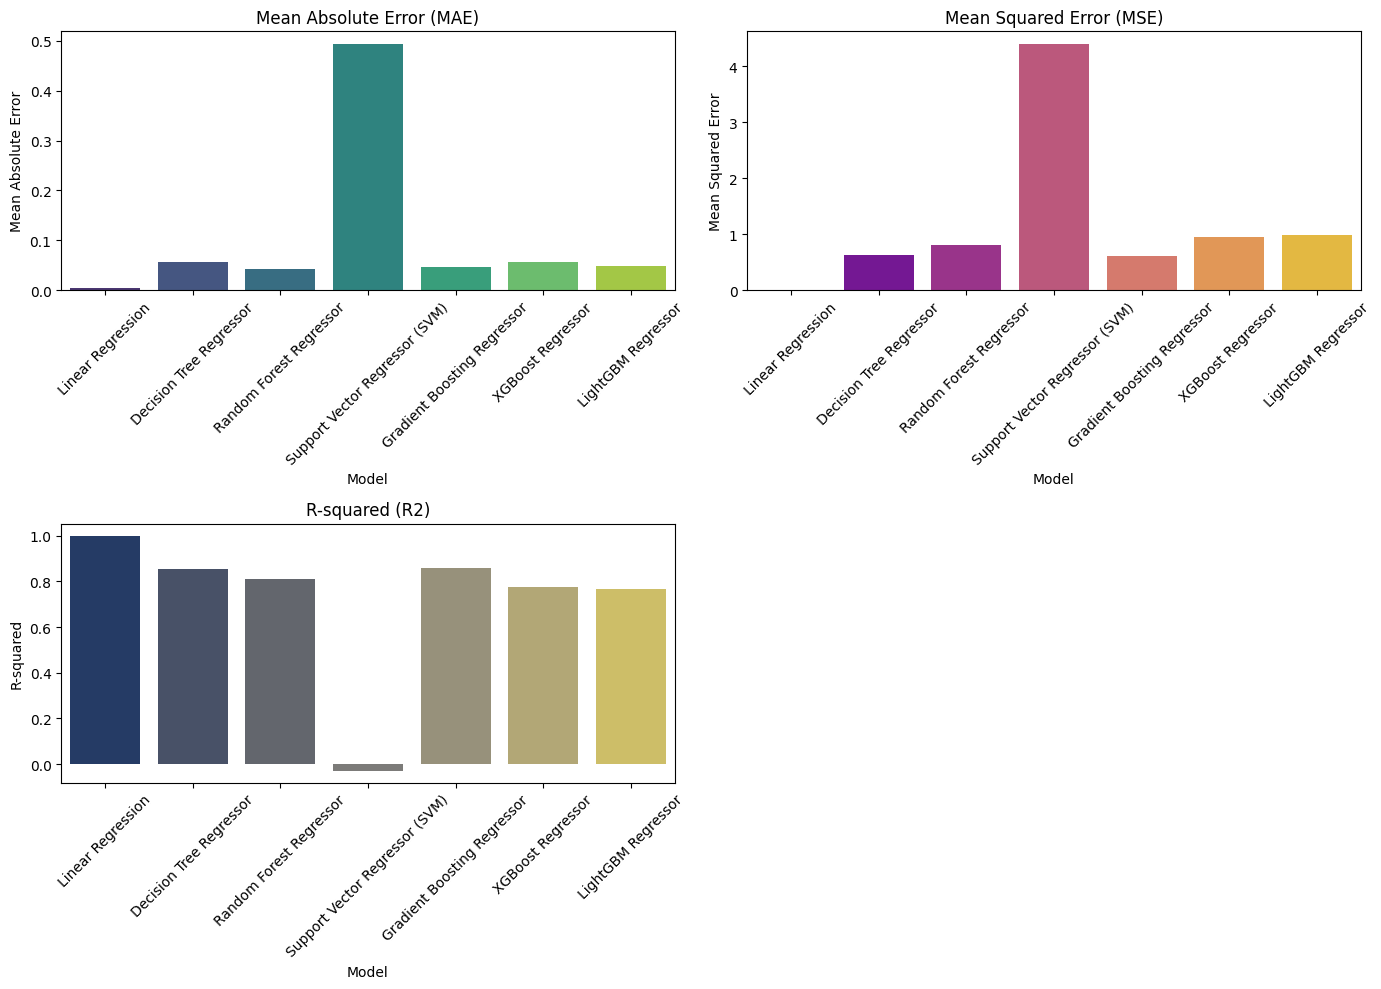

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE Bar Plot
sns.barplot(x="Model", y="MAE", data=eval_df, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Mean Absolute Error (MAE)")
axes[0, 0].set_ylabel("Mean Absolute Error")
axes[0, 0].tick_params(axis='x', rotation=45)

# MSE Bar Plot
sns.barplot(x="Model", y="MSE", data=eval_df, palette="plasma", ax=axes[0, 1])
axes[0, 1].set_title("Mean Squared Error (MSE)")
axes[0, 1].set_ylabel("Mean Squared Error")
axes[0, 1].tick_params(axis='x', rotation=45)

# R² Bar Plot
sns.barplot(x="Model", y="R2", data=eval_df, palette="cividis", ax=axes[1, 0])
axes[1, 0].set_title("R-squared (R2)")
axes[1, 0].set_ylabel("R-squared")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encoding categorical features
categorical_features = ['Platform', 'Genre', 'Publisher']
numerical_features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Cross-validation Score: -0.08966961272426542
